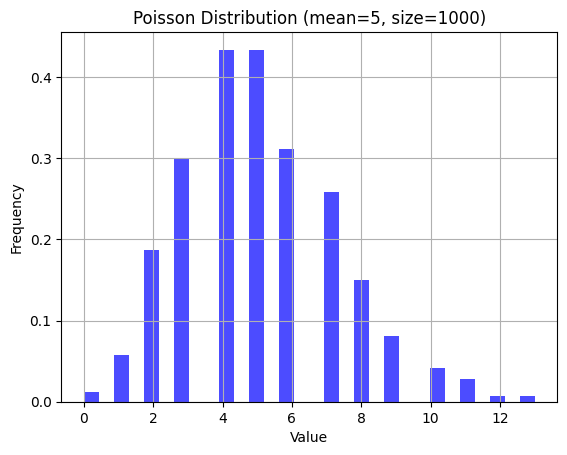

Data saved to poisson.csv


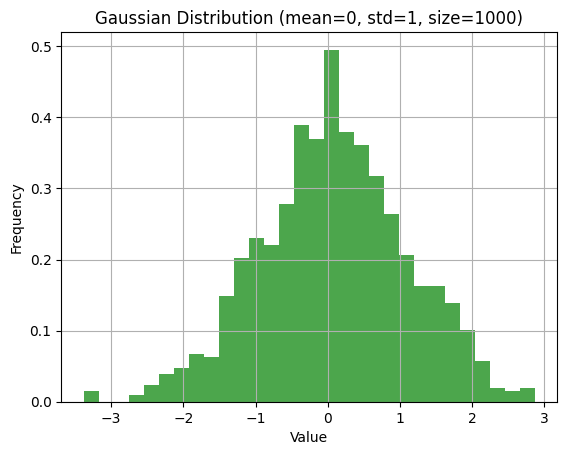

Data saved to gaussian.csv


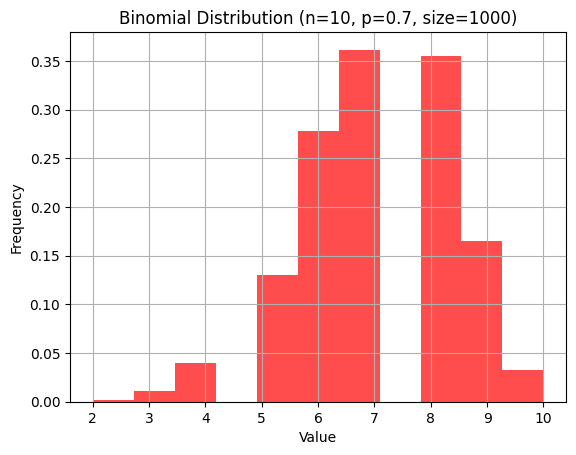

Data saved to binomial.csv


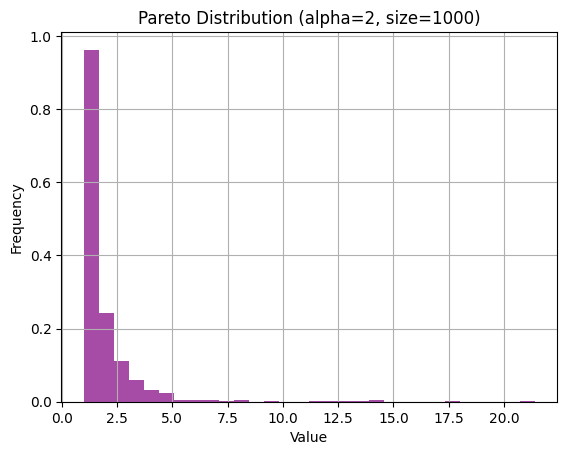

Data saved to pareto.csv


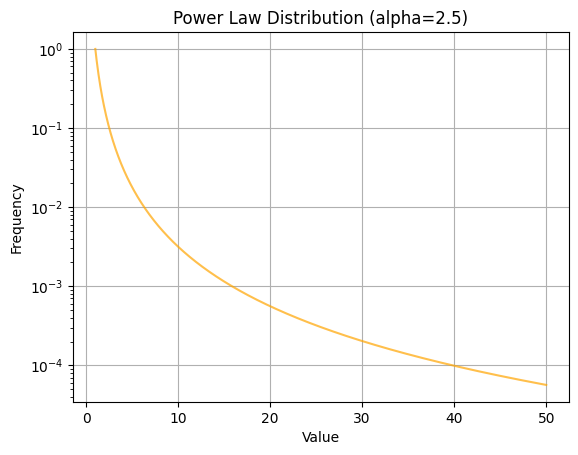

Data saved to powerlaw.csv


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pareto

# Function to generate and visualize distributions
def generate_distribution(
    dist_type,
    sample_size=1000,
    mean=None,
    std=None,
    range_val=None,
    prob=None,
    alpha=None,
    save_csv=False,
    file_name="distribution.csv"
):
    """
    Generates and visualizes various probability distributions, and optionally saves the data as a CSV file.
    
    Parameters:
        dist_type (str): The type of distribution to generate. Options: 'poisson', 'gaussian', 'binomial', 'pareto', 'powerlaw'.
        sample_size (int): Number of samples to generate. Default is 1000.
        mean (float): Mean of the distribution (applicable to Gaussian and Poisson). Default is None.
        std (float): Standard deviation (applicable to Gaussian). Default is None.
        range_val (tuple): Range of values for Power Law (default is None, applicable to Power Law).
        prob (float): Probability of success (applicable to Binomial). Default is None.
        alpha (float): Shape parameter (applicable to Pareto and Power Law). Default is None.
        save_csv (bool): If True, saves the generated data as a CSV file. Default is False.
        file_name (str): The name of the CSV file to save. Default is 'distribution.csv'.
    
    Returns:
        None: Displays a plot of the distribution and optionally saves the data to a CSV file.
    """
    # Initialize data array
    data = None

    # Generate Poisson distribution
    if dist_type.lower() == 'poisson':
        if mean is None:
            mean = 5  # Default mean for Poisson
        data = np.random.poisson(mean, sample_size)
        plt.hist(data, bins=30, alpha=0.7, color='blue', density=True)
        plt.title(f'Poisson Distribution (mean={mean}, size={sample_size})')
        plt.xlabel('Value')
        plt.ylabel('Frequency')

    # Generate Gaussian (Normal) distribution
    elif dist_type.lower() == 'gaussian':
        if mean is None:
            mean = 0  # Default mean
        if std is None:
            std = 1  # Default standard deviation
        data = np.random.normal(mean, std, sample_size)
        plt.hist(data, bins=30, alpha=0.7, color='green', density=True)
        plt.title(f'Gaussian Distribution (mean={mean}, std={std}, size={sample_size})')
        plt.xlabel('Value')
        plt.ylabel('Frequency')

    # Generate Binomial distribution
    elif dist_type.lower() == 'binomial':
        if prob is None:
            prob = 0.5  # Default probability of success
        n = 10  # Number of trials (can be parameterized as needed)
        data = np.random.binomial(n, prob, sample_size)
        plt.hist(data, bins=n + 1, alpha=0.7, color='red', density=True)
        plt.title(f'Binomial Distribution (n={n}, p={prob}, size={sample_size})')
        plt.xlabel('Value')
        plt.ylabel('Frequency')

    # Generate Pareto distribution
    elif dist_type.lower() == 'pareto':
        if alpha is None:
            alpha = 3  # Default shape parameter
        data = (np.random.pareto(alpha, sample_size) + 1) * 1  # Scale factor can be adjusted
        plt.hist(data, bins=30, alpha=0.7, color='purple', density=True)
        plt.title(f'Pareto Distribution (alpha={alpha}, size={sample_size})')
        plt.xlabel('Value')
        plt.ylabel('Frequency')

    # Generate Power Law distribution
    elif dist_type.lower() == 'powerlaw':
        if alpha is None:
            alpha = 2.5  # Default shape parameter
        if range_val is None:
            range_val = (1, 100)  # Default range
        x = np.linspace(range_val[0], range_val[1], sample_size)
        data = x**(-alpha)
        plt.plot(x, data, alpha=0.7, color='orange')
        plt.title(f'Power Law Distribution (alpha={alpha})')
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.yscale('log')

    else:
        raise ValueError("Invalid distribution type. Choose from 'poisson', 'gaussian', 'binomial', 'pareto', or 'powerlaw'.")

    # Show the plot
    plt.grid(True)
    plt.show()

    # Save to CSV if required
    if save_csv and data is not None:
        if dist_type.lower() == 'powerlaw':
            data = pd.DataFrame({'x': x, 'y': data})  # For Power Law, save x and y values
        else:
            data = pd.DataFrame(data, columns=['value'])
        data.to_csv(file_name, index=False)
        print(f"Data saved to {file_name}")

# Example usage:
# Visualize Poisson distribution and save it as a CSV
generate_distribution('poisson', sample_size=1000, mean=5, save_csv=True, file_name='poisson.csv')

# Visualize Gaussian distribution
generate_distribution('gaussian', sample_size=1000, mean=0, std=1, save_csv=True, file_name='gaussian.csv')

# Visualize Binomial distribution
generate_distribution('binomial', sample_size=1000, prob=0.7, save_csv=True, file_name='binomial.csv')

# Visualize Pareto distribution
generate_distribution('pareto', sample_size=1000, alpha=2, save_csv=True, file_name='pareto.csv')

# Visualize Power Law distribution
generate_distribution('powerlaw', sample_size=1000, alpha=2.5, range_val=(1, 50), save_csv=True, file_name='powerlaw.csv')
